## Dimensionality reduction

Piuttosto che selezionare le feature, le combino per creare un nuovo set di feature
- nella PCA le feature che creo sono una combinazione lineare delle feature originali
- vedi corso sugli algoritmi
- PRO conservo più informazioni possibili
- CONTRO le feature diventano difficili da interpretare

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_regression, RFE

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor


In [2]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [3]:
steps = [
    ( 'scaler', StandardScaler() ), # buona pratica prima della PCA!
    ( 'pca', PCA(n_components=5) ),
    ( 'model', KNeighborsRegressor() )
]

In [4]:
pipe = Pipeline(steps)

In [5]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('model', KNeighborsRegressor())])

In [6]:
pca = pipe['pca']
pca

PCA(n_components=5)

In [7]:
pca.explained_variance_ratio_

array([0.4724674 , 0.11259091, 0.09556651, 0.06547082, 0.06398017])

In [8]:
sum(pca.explained_variance_ratio_)

0.8100758227041646

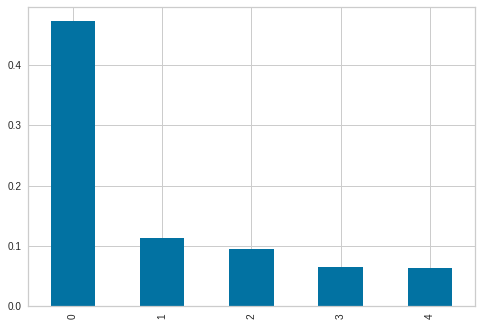

In [16]:
variances = pd.Series(pca.explained_variance_ratio_)
variances.plot.bar()

In [9]:
pca.components_

array([[ 0.24253207, -0.25320877,  0.34797401,  0.01564026,  0.34327149,
        -0.19495634,  0.31846027, -0.32809943,  0.31814769,  0.33627542,
         0.199304  , -0.20579791,  0.30732643],
       [-0.32318209, -0.3083812 ,  0.12353184,  0.47445279,  0.21857544,
         0.1616892 ,  0.30068157, -0.33004353, -0.2564512 , -0.22852651,
        -0.3249705 ,  0.2372294 , -0.08340778],
       [ 0.27066417,  0.31779195, -0.02040027,  0.28790715,  0.11002934,
         0.56022653, -0.02055584, -0.02892128,  0.29051225,  0.22954552,
        -0.3447778 , -0.30735859, -0.25454613],
       [ 0.06908145,  0.35855977,  0.01198296,  0.34866904,  0.09043104,
        -0.51602998, -0.06584865,  0.17026181, -0.16763033, -0.08789269,
        -0.41834228, -0.25162541,  0.40374304],
       [ 0.0223006 ,  0.02931453,  0.0146434 ,  0.71938008, -0.17168681,
        -0.13002029, -0.15415031,  0.17410948,  0.20996022,  0.16286309,
         0.46391035,  0.29373452, -0.0914477 ]])

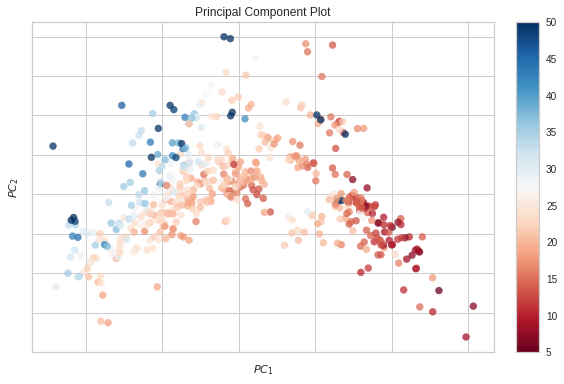

/home/piero/Desktop/pythonazzo/venv/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


PCA(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f02eadb1a00>,
    colormap='RdBu')

In [18]:
from yellowbrick.features import pca_decomposition

pca_decomposition( X, y, scale=True )

Esercizio: usa la grid search per trovare il numero giusti di componenti della PCA e il giusto k per il KNN